#Introducción a Machine Learning
Dataset: https://www.kaggle.com/competitions/spaceship-titanic/data

Importamos las librerías necesarias

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno # nos da una gráfica mostrandos los NA que existen
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Importamos los archivos .csv previamente cargados en nuestro entorno de Google Colab

In [15]:
ruta = '/content/Data/'

train = pd.read_csv(ruta + 'train.csv')

Visualizamos los dataframes que hemos cargado

In [16]:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


Mediante la librería missingno se obtiene la siguiente represetnación gráfica de los NaN en el dataframe, que vienen dada por los espacios en blanco.

<Axes: >

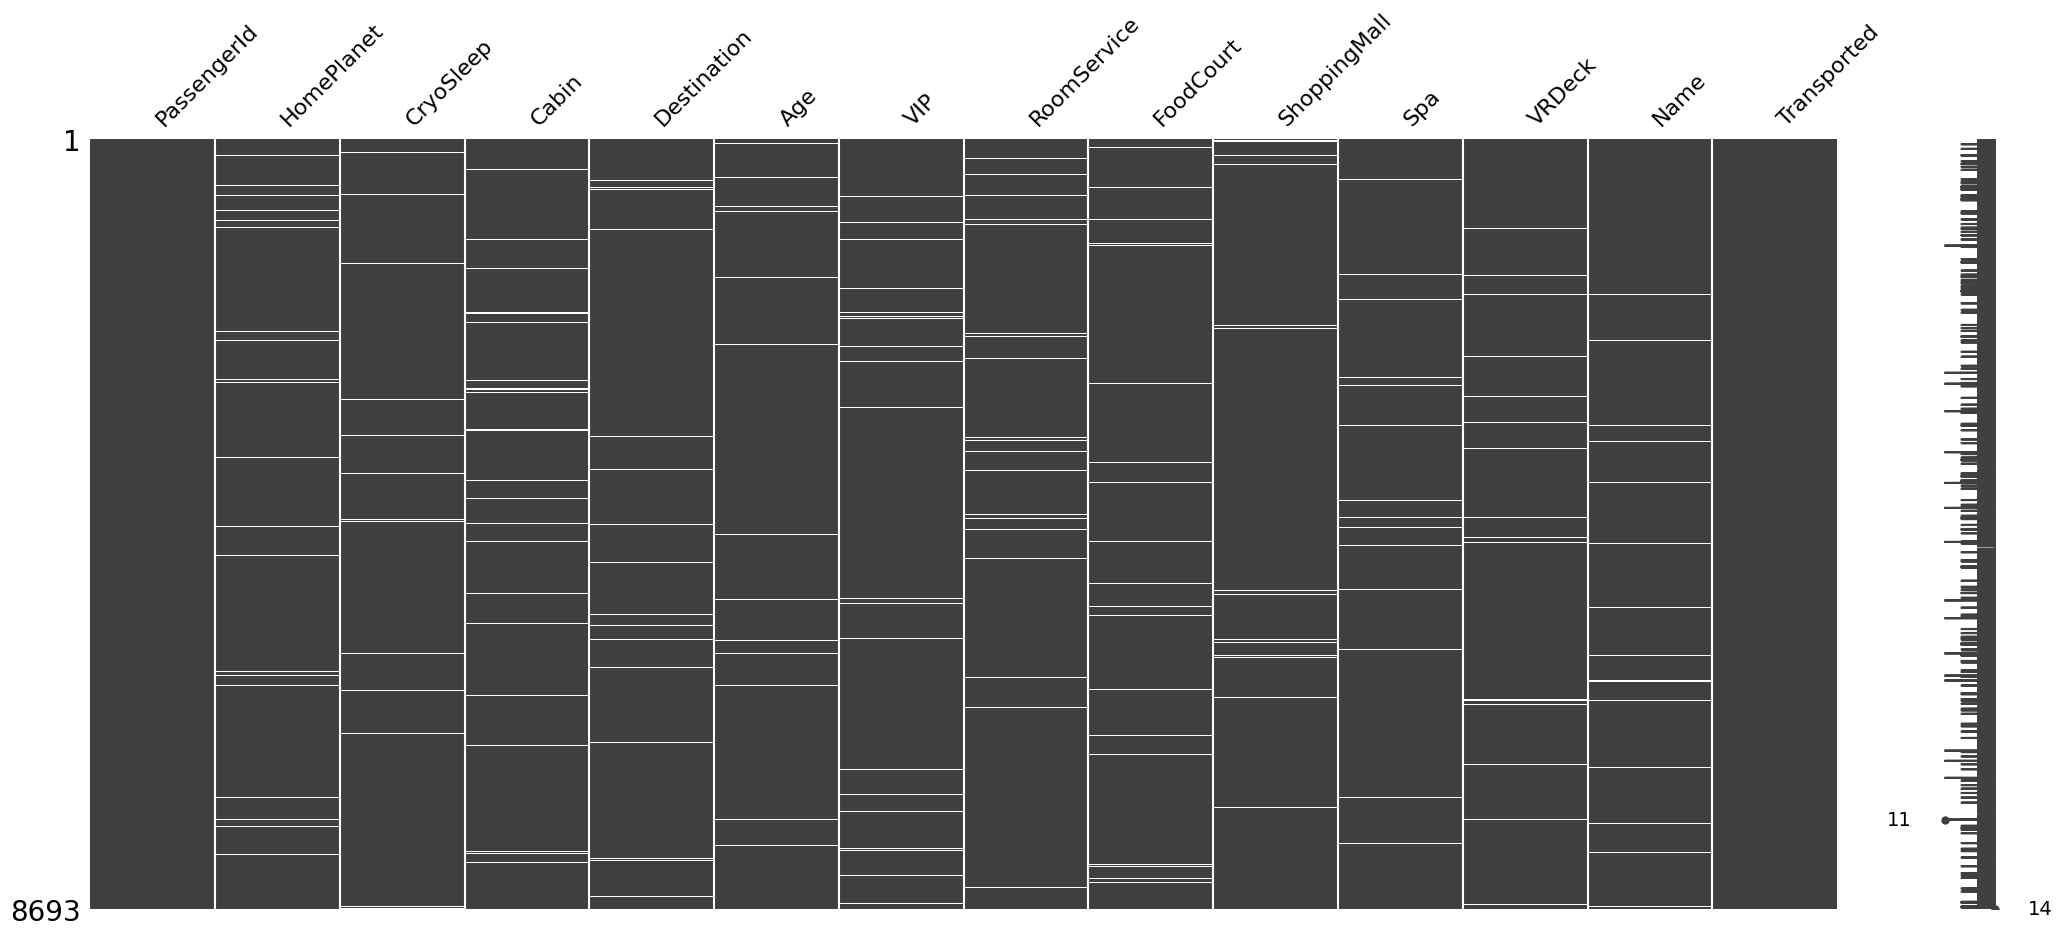

In [17]:
msno.matrix(train)

Revisamos la cantidad de NaN que contiene nuestro dataframe

In [6]:
train.isna().sum() #Nan

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Revisamos los valores que existen en la columna "Cabin"

In [7]:
train['Cabin'].value_counts()

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

Método para eliminar columnas

In [18]:
def eliminar_col(df,cols):
  df = df.drop(cols, axis = 1)
  df = df.dropna()
  return df

In [19]:
train = eliminar_col(train,['PassengerId','Name','Cabin'])

In [20]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [12]:
train['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [21]:
def convertir_indicador(df, col, subcol1, subcol2, subcol3):
  df[col] = df[col].map({subcol1: 1, subcol2: 2, subcol3: 3})
  return df

In [22]:
train = convertir_indicador(train,'HomePlanet', 'Earth','Europa','Mars')
train = convertir_indicador(train,'Destination', 'TRAPPIST-1e','PSO J318.5-22','55 Cancri e')
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,2,False,1,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,1,False,1,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,2,False,1,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,2,False,1,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,1,False,1,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,2,False,3,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,1,True,2,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,1,False,1,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,2,False,3,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [24]:
train = train.astype(int)

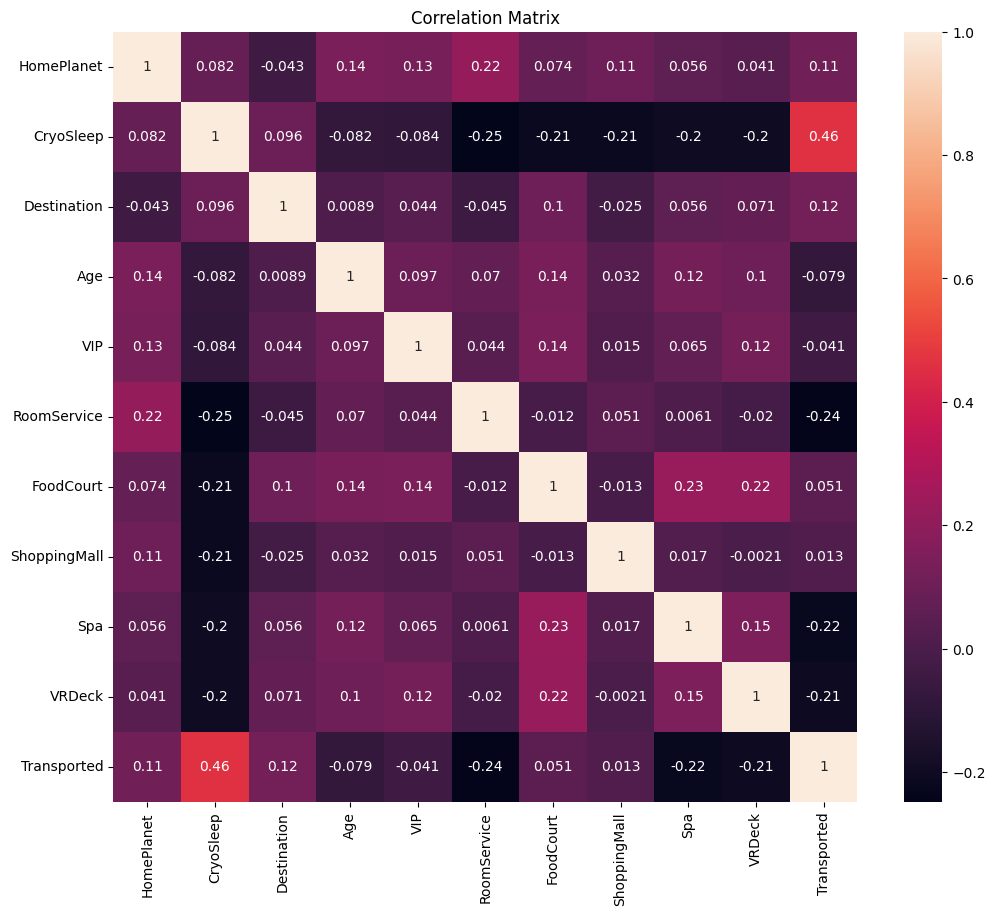

In [25]:
features = ['HomePlanet','CryoSleep','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Transported']#,'Earth','Europa','Mars','55 Cancri e','PSO J318.5-22','TRAPPIST-1e']
correlation_matrix = train[features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [26]:
train_y = train['Transported']
train = train.drop('Transported',axis=1)
train_y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 6923, dtype: int64

In [27]:
train_y = train_y.to_frame()

In [28]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,2,0,1,39,0,0,0,0,0,0
1,1,0,1,24,0,109,9,25,549,44
2,2,0,1,58,1,43,3576,0,6715,49
3,2,0,1,33,0,0,1283,371,3329,193
4,1,0,1,16,0,303,70,151,565,2
...,...,...,...,...,...,...,...,...,...,...
8688,2,0,3,41,1,0,6819,0,1643,74
8689,1,1,2,18,0,0,0,0,0,0
8690,1,0,1,26,0,0,0,1872,1,0
8691,2,0,3,32,0,0,1049,0,353,3235


In [29]:
train_y

,Transported
0,0
1,1
2,0
3,0
4,1
...,...
8688,0
8689,0
8690,1
8691,0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(train, train_y, test_size=0.1, random_state = 5)

print(train.shape, X_train.shape, X_test.shape)
X_train.describe().transpose()

(6923, 10) (6230, 10) (693, 10)


,count,mean,std,min,25%,50%,75%,max
HomePlanet,6230.0,1.666453,0.796413,1.0,1.0,1.0,2.00,3.0
CryoSleep,6230.0,0.351204,0.477385,0.0,0.0,0.0,1.00,1.0
Destination,6230.0,1.519422,0.822616,1.0,1.0,1.0,2.00,3.0
Age,6230.0,28.856661,14.466879,0.0,19.0,27.0,38.00,79.0
VIP,6230.0,0.024238,0.153798,0.0,0.0,0.0,0.00,1.0
RoomService,6230.0,226.351685,679.134316,0.0,0.0,0.0,46.00,14327.0
FoodCourt,6230.0,489.816212,1713.622482,0.0,0.0,0.0,82.00,29813.0
ShoppingMall,6230.0,177.349599,642.333630,0.0,0.0,0.0,30.00,23492.0
Spa,6230.0,314.778010,1157.975267,0.0,0.0,0.0,62.00,22408.0
VRDeck,6230.0,305.000161,1139.971540,0.0,0.0,0.0,49.75,20336.0


In [31]:
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)  ## Encontrar la media y varianza. # Aplicar scaler + obtener scaler
X_test = escalar.transform(X_test) # Aplicar scaler

In [32]:
model = LogisticRegression()

model.fit(X_train, y_train)  ##Entranamiento

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [33]:
#Realizamos una predicción
print(X_test.shape)
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_pred)

(693, 10)
(693,)
[1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1
 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0
 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0
 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0
 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1
 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1
 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1
 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1
 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1
 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0
 1 1 0 1

In [34]:
#Verifico la matriz de Confusión
print(y_test.shape)
print(y_pred.shape)

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

(693, 1)
(693,)
Matriz de Confusión:
[[253  84]
 [ 70 286]]


In [35]:
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.772972972972973


In [36]:
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.7777777777777778
